# Comparison using splitwavepy

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import splitwavepy as sw
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import NonLinLocPy

In [3]:
# Load data:
archive_path = "data/mseed"
archive_vs_file = "archive"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"

starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(archive_path, starttime, endtime)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 80.0]
st = load_wfs_obj.read_waveform_data()


In [4]:
# Add noise to data:
for i in range(len(st)):
    st[i].data = st[i].data + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1))) + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1)))

Station: ST01


<IPython.core.display.Javascript object>


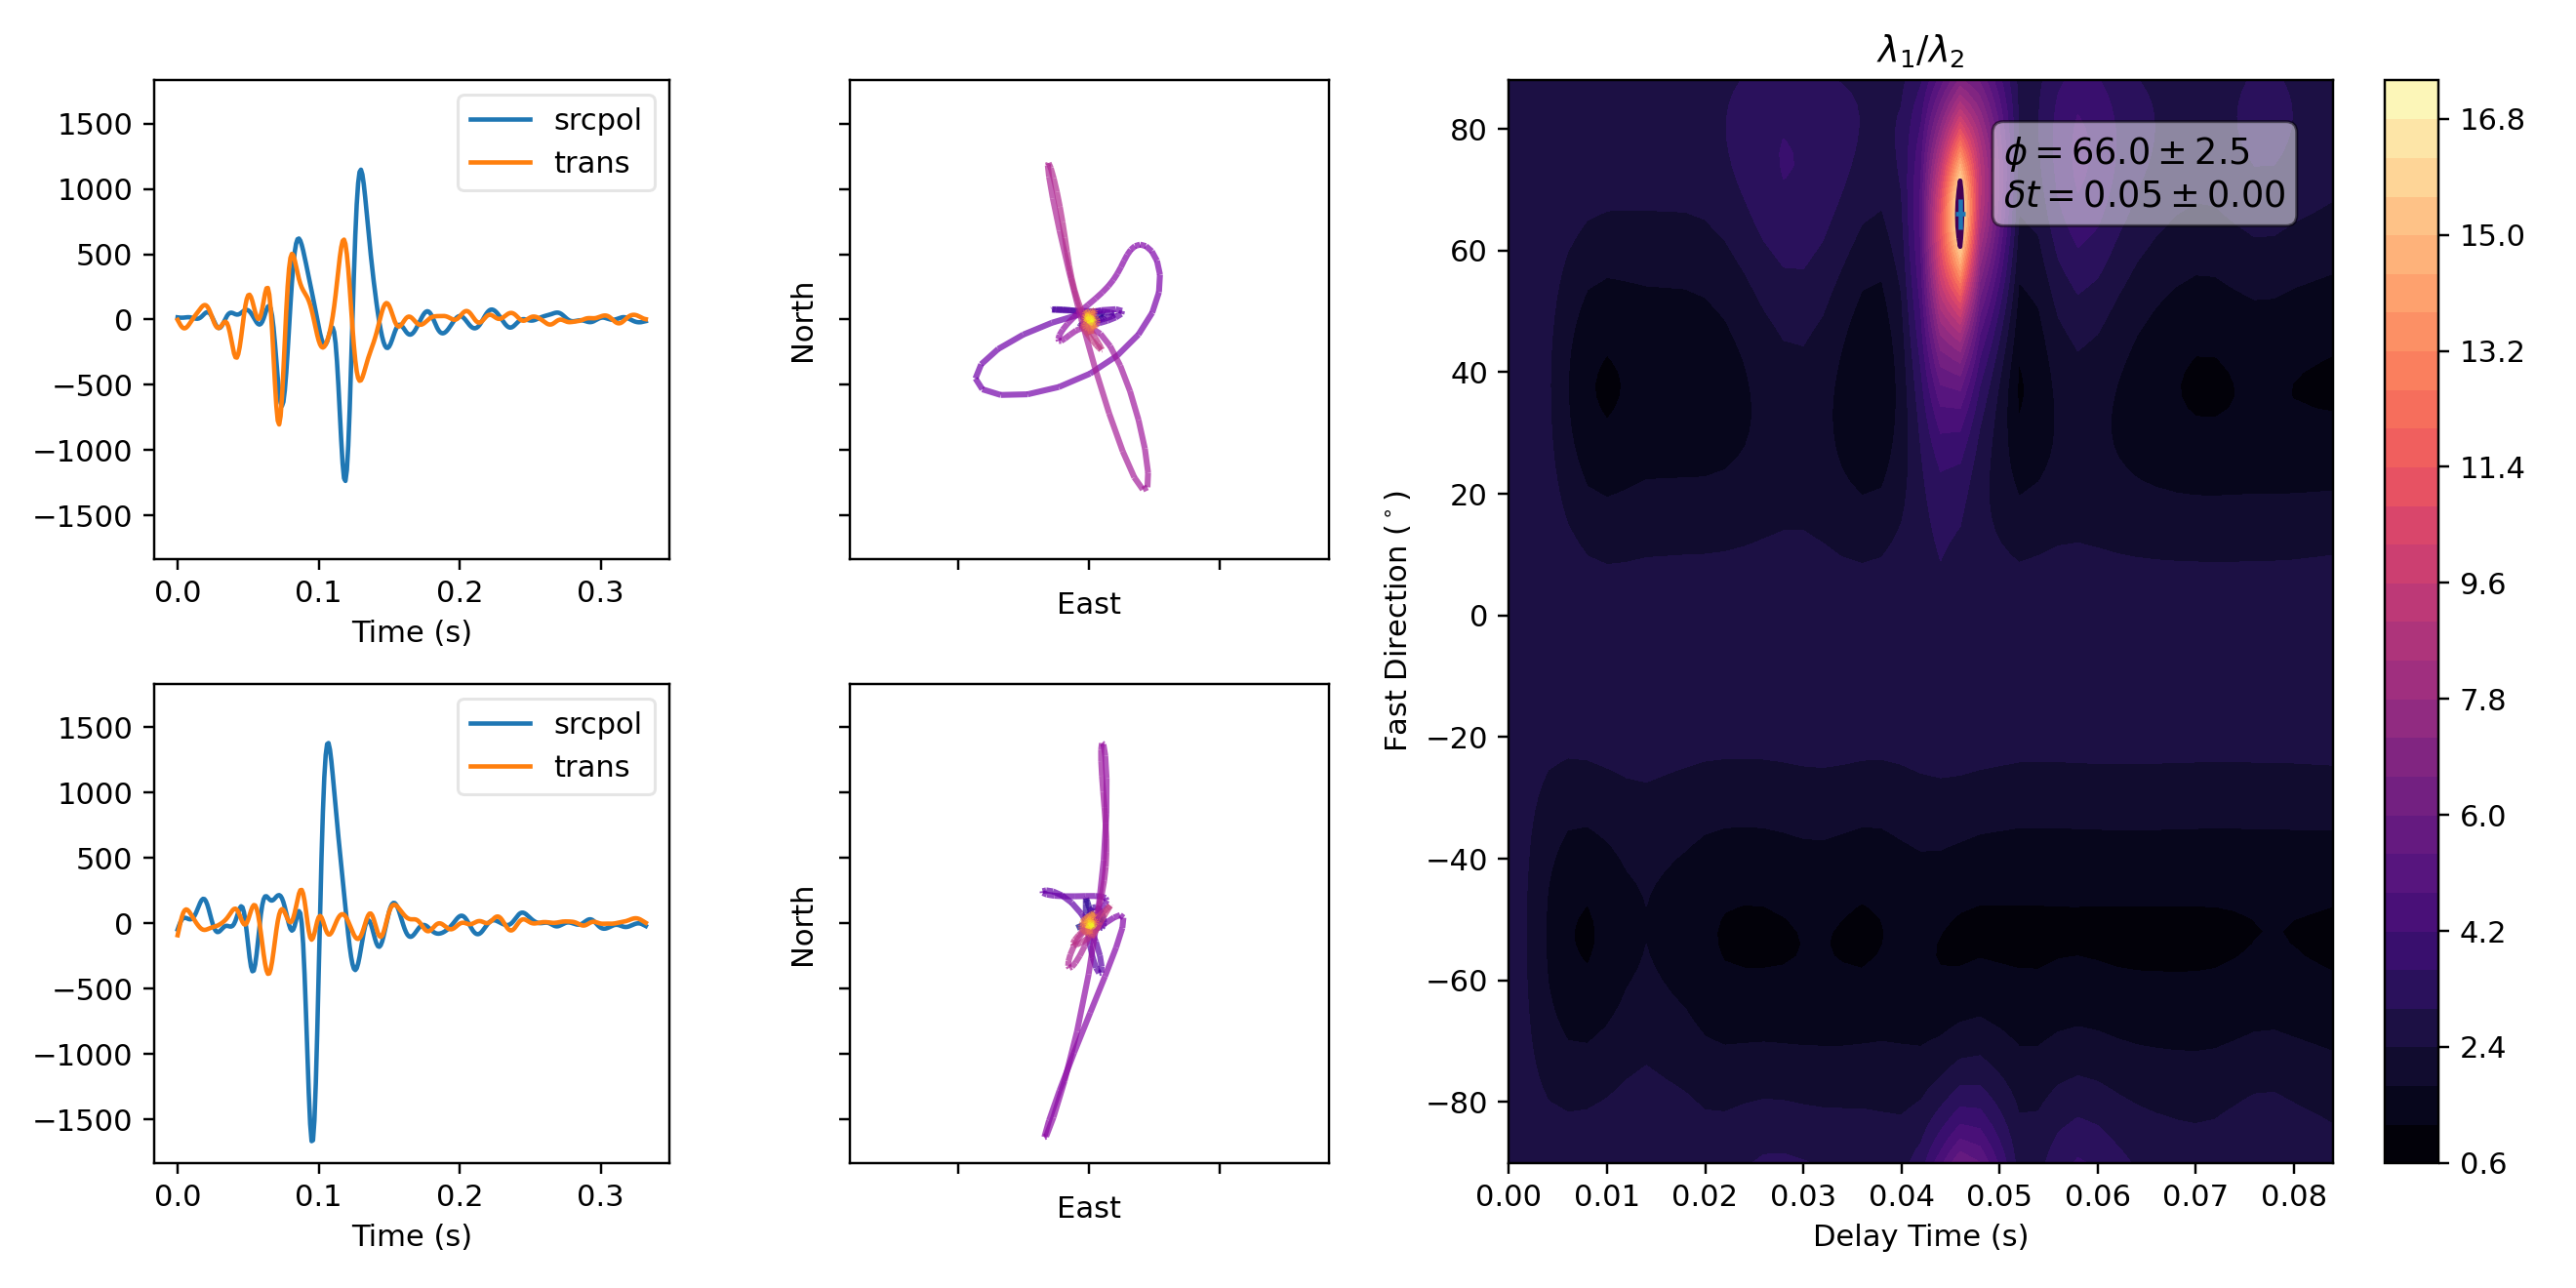

Station: ST02


<IPython.core.display.Javascript object>


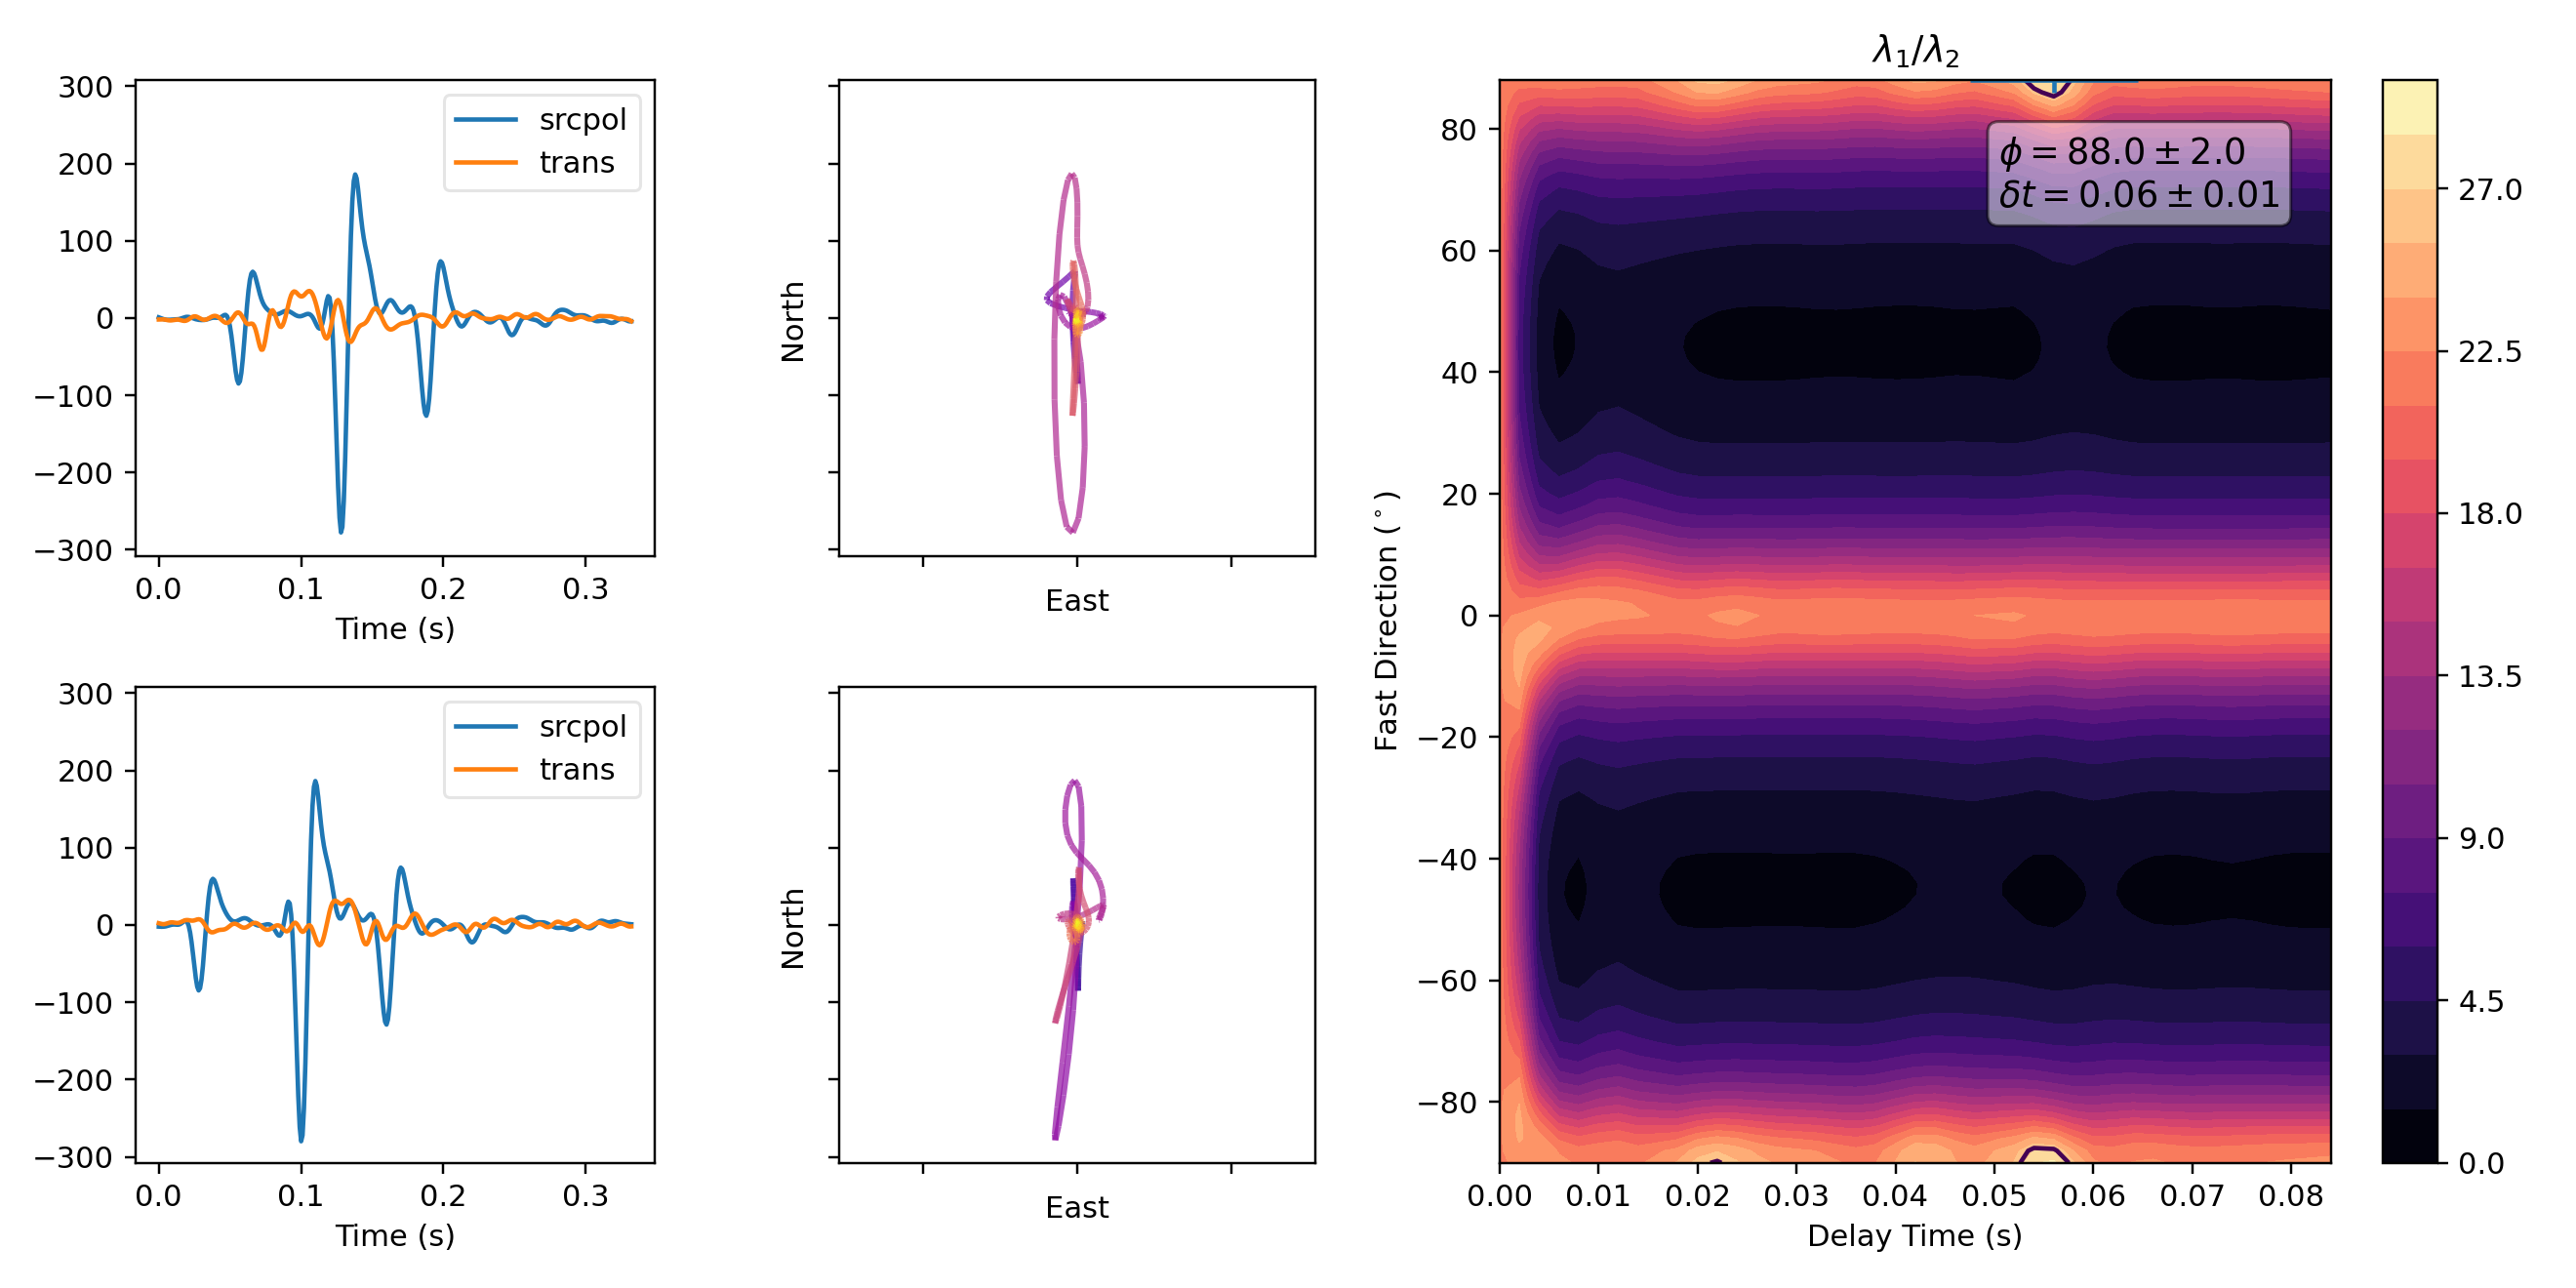

Station: ST03


<IPython.core.display.Javascript object>


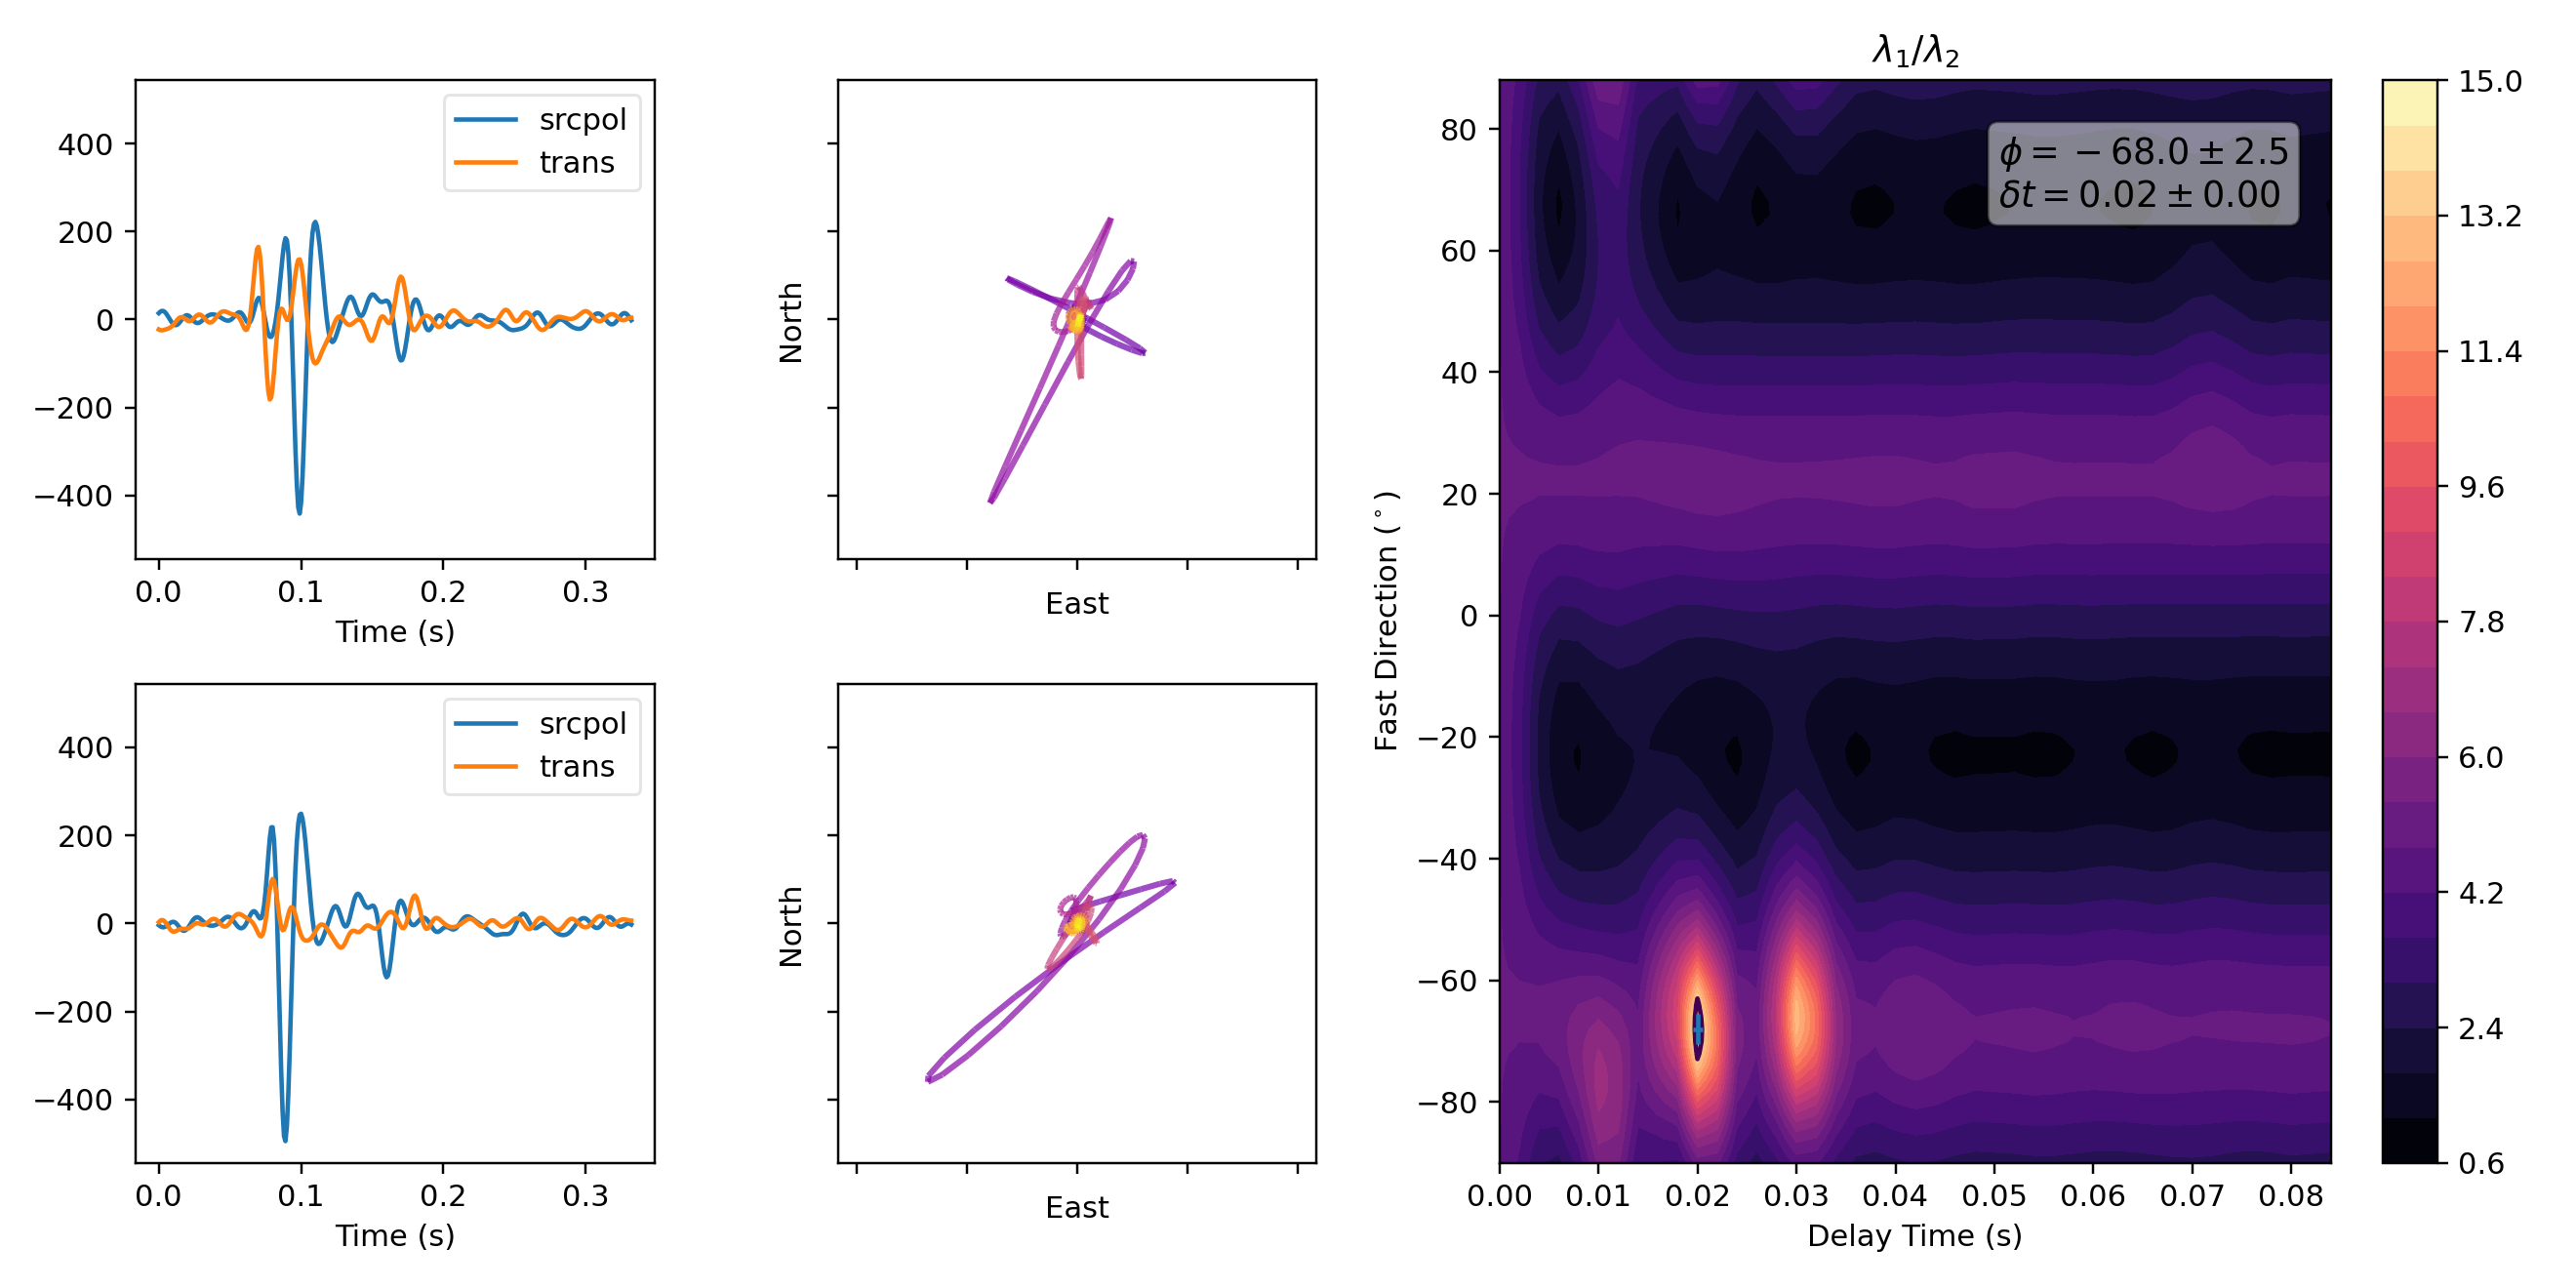

Station: ST04


<IPython.core.display.Javascript object>


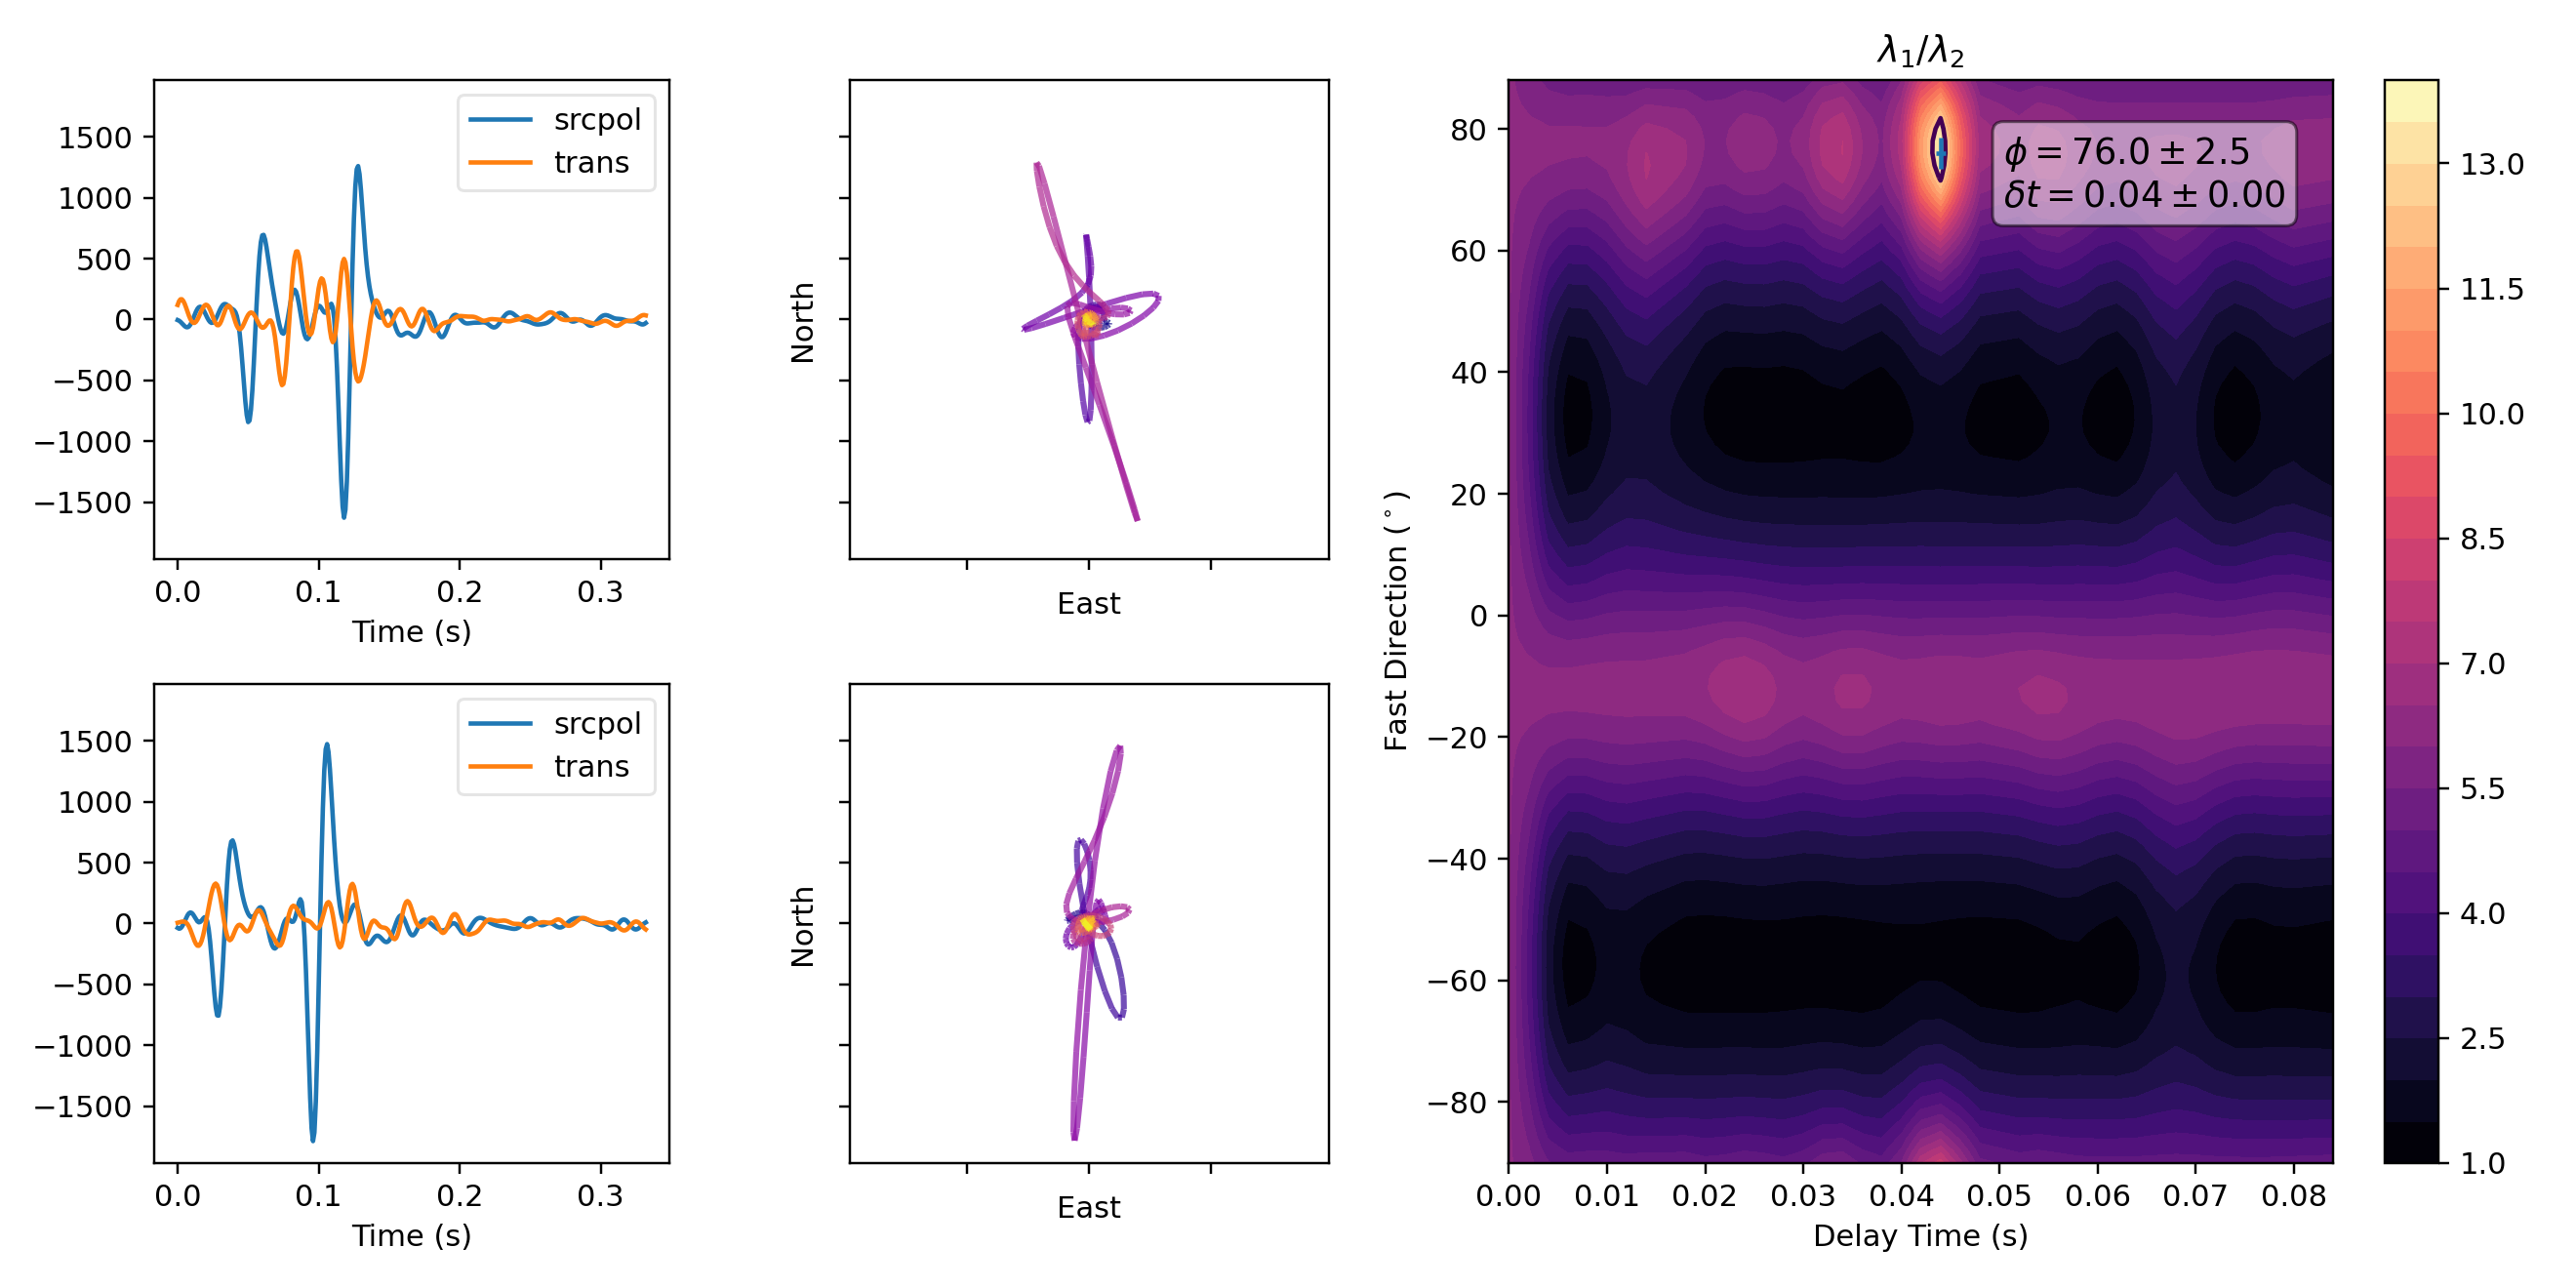

Station: ST05


<IPython.core.display.Javascript object>


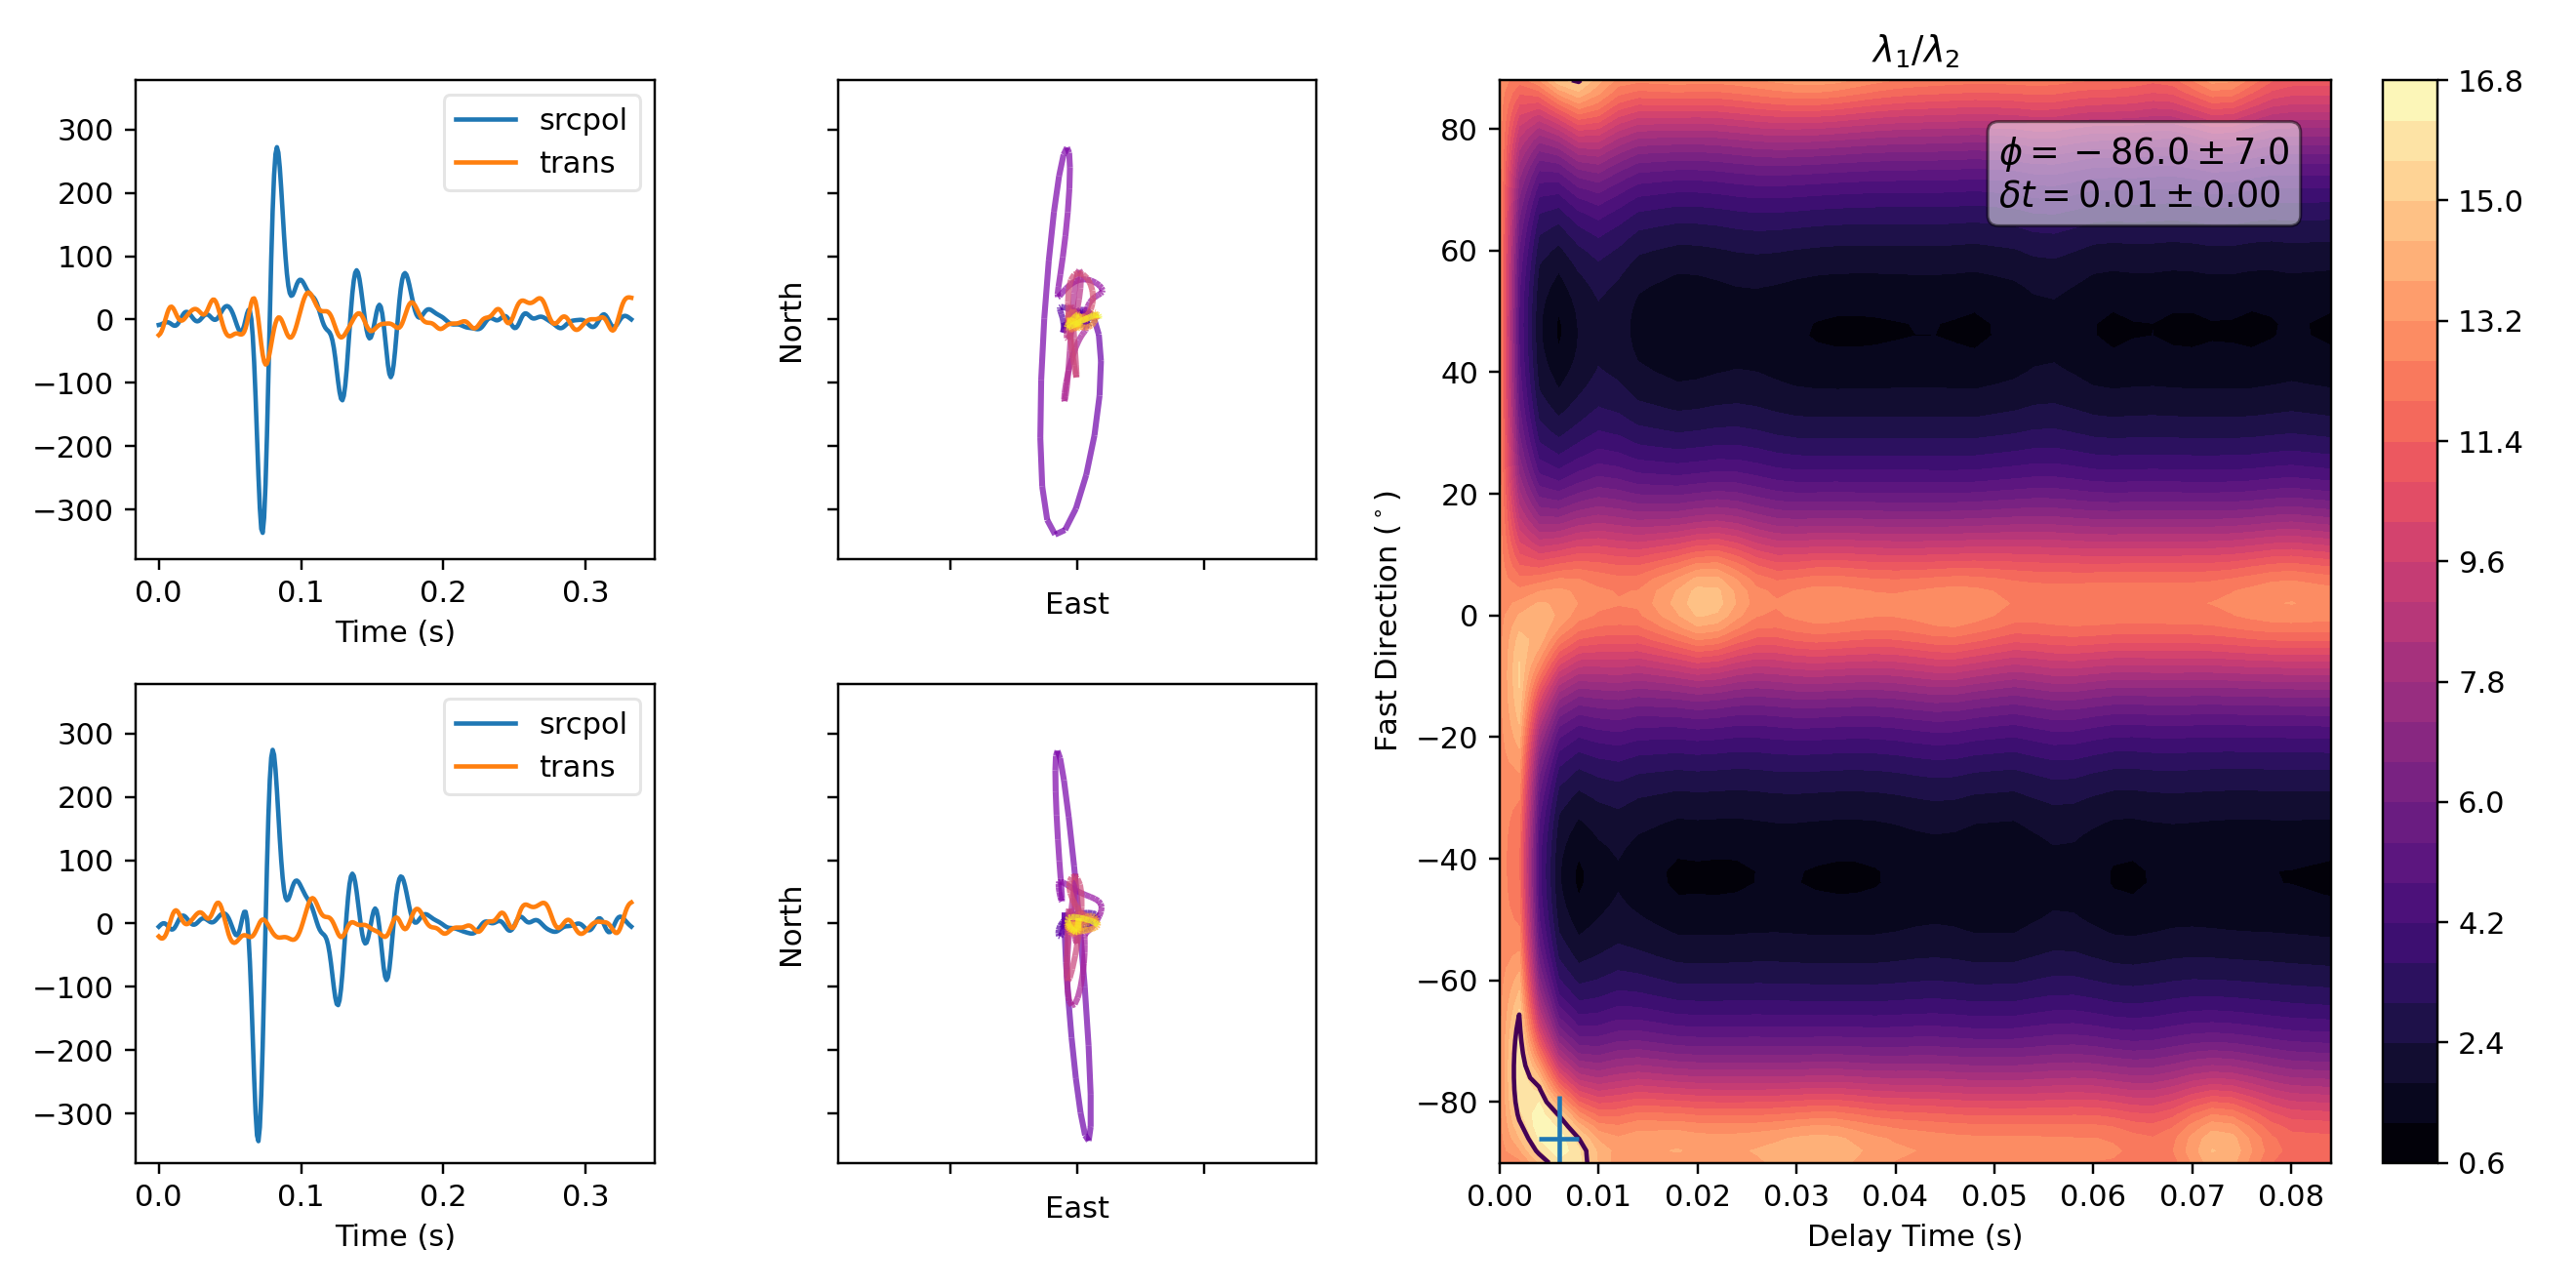

In [5]:
# Calculate splitting:
stations = ["ST01", "ST02", "ST03", "ST04", "ST05"]
for station in stations:
    print("Station:", station)
    overall_win_start_pre_fast_S_pick = 0.4 #0.1
    overall_win_start_post_fast_S_pick = 0.6 #0.2
    nonlinloc_hyp_data = NonLinLocPy.read_nonlinloc.read_hyp_file(nonlinloc_event_path)
    st_tmp = st.select(station=station).copy()
    st_tmp.trim(starttime=nonlinloc_hyp_data.phase_data[station]['S']['arrival_time'] - overall_win_start_pre_fast_S_pick, endtime=nonlinloc_hyp_data.phase_data[station]['S']['arrival_time'] + overall_win_start_post_fast_S_pick)
    north = st_tmp.select(channel='??N')[0].data 
    east = st_tmp.select(channel='??E')[0].data 
    sample_interval = st_tmp[0].stats.delta 
    # Plot real data pre-splitting:
    realdata = sw.Pair(north, east, delta=sample_interval)
#     realdata.plot()
    # Measure splitting:
    measure = sw.EigenM(realdata)
    measure.plot()